In [1]:
import acquire, wrangle_zillow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler



df = wrangle_zillow.zillow_datac()
df.shape

(77414, 63)

In [2]:
df = wrangle_zillow.get_counties(df)

In [3]:
df = df.drop(columns=['parcelid','typeconstructiontypeid','storytypeid','propertylandusetypeid',
                      'heatingorsystemtypeid','buildingclasstypeid','architecturalstyletypeid',
                      'airconditioningtypeid','id','basementsqft','buildingqualitytypeid','decktypeid',
                      'finishedfloor1squarefeet','finishedsquarefeet12','finishedsquarefeet13',
                      'finishedsquarefeet50','finishedsquarefeet15','finishedsquarefeet6','fireplacecnt',
                      'garagetotalsqft','poolsizesum','pooltypeid10','pooltypeid2','pooltypeid7',
                      'propertycountylandusecode','propertyzoningdesc','rawcensustractandblock',
                      'regionidcounty','regionidneighborhood','threequarterbathnbr','unitcnt',
                      'yardbuildingsqft17','yardbuildingsqft26','fireplaceflag',
                      'assessmentyear','taxdelinquencyflag','taxdelinquencyyear','id',])
df
df.shape

(77414, 26)

In [4]:
df.isnull().sum()

bathroomcnt                         0
bedroomcnt                          0
calculatedbathnbr                3212
calculatedfinishedsquarefeet     1108
fullbathcnt                      3212
garagecarcnt                    54161
hashottuborspa                  76157
latitude                            0
longitude                           0
lotsizesquarefeet                7060
poolcnt                         63196
regionidcity                     1519
regionidzip                       273
roomcnt                             1
yearbuilt                        1166
numberofstories                 59340
structuretaxvaluedollarcnt       1264
taxvaluedollarcnt                 924
landtaxvaluedollarcnt            1606
taxamount                         509
censustractandblock              2090
logerror                            0
transactiondate                     0
LA                                  0
Orange                              0
Ventura                             0
dtype: int64

In [5]:
df = wrangle_zillow.create_features(df)

In [6]:
# dropping more columns
df = df.drop(columns=['calculatedbathnbr','fullbathcnt','garagecarcnt','hashottuborspa','regionidcity',
                 'regionidzip','numberofstories','censustractandblock','cola','transactiondate'])

In [7]:
df = wrangle_zillow.remove_outliers(df)
df

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,yearbuilt,structuretaxvaluedollarcnt,...,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio
20,2.0,4.0,3633.0,34560018.0,-118169806.0,9826.0,NaN,0.0,2005.0,222321.0,...,0.042463,1,0,0,12.0,0.023417,0.225574,61.194880,7.541624,2.000000
28,4.0,5.0,2865.0,33879216.0,-118361434.0,4990.0,NaN,0.0,1972.0,271704.0,...,0.206470,1,0,0,45.0,0.012578,0.114555,94.835602,112.128257,1.250000
30,2.0,2.0,1090.0,33974100.0,-118423000.0,40247.0,NaN,0.0,2004.0,232897.0,...,0.021853,1,0,0,13.0,0.017242,0.923944,213.666972,3.097647,1.000000
33,2.0,3.0,2077.0,34012977.0,-118479243.0,6490.0,NaN,0.0,1926.0,210192.0,...,-0.040807,1,0,0,91.0,0.012253,0.148990,101.199807,67.267797,1.500000
34,3.0,3.0,2019.0,34003621.0,-118477513.0,6763.0,NaN,0.0,NaN,451786.0,...,-0.018862,1,0,0,NaN,0.011900,0.155257,223.767211,144.864114,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,3.0,4.0,1921.0,34572256.0,-118024872.0,6763.0,NaN,0.0,1990.0,129566.0,...,0.020615,1,0,0,27.0,0.017654,0.155257,67.447163,4.798610,1.333333
77410,3.0,4.0,1780.0,34571498.0,-118039412.0,6822.0,NaN,0.0,1989.0,100744.0,...,0.013209,1,0,0,28.0,0.019014,0.156612,56.597753,3.690853,1.333333
77411,2.0,3.0,1549.0,34575327.0,-118054267.0,6987.0,NaN,0.0,1990.0,149241.0,...,0.037129,1,0,0,27.0,0.016744,0.160399,96.346675,7.119937,1.500000
77412,3.0,3.0,1339.0,34572200.0,-118053000.0,271458.0,NaN,0.0,1990.0,118900.0,...,0.007204,1,0,0,27.0,0.016895,6.231818,88.797610,0.109409,1.000000


In [8]:
#going to drop the rest of the nulls
df = df.drop(columns=['poolcnt'])
df.shape

(67481, 22)

In [9]:
df.dropna(inplace=True)
df.shape

(67395, 22)

In [10]:
#making sure we dont have any nulls
df.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
latitude                        0
longitude                       0
lotsizesquarefeet               0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
LA                              0
Orange                          0
Ventura                         0
age                             0
taxrate                         0
acres                           0
structure_dollar_per_sqft       0
land_dollar_per_sqft            0
bed_bath_ratio                  0
dtype: int64

In [11]:
def split_scale(df):
    train_validate, test = train_test_split(df, test_size = .2, random_state = 123)
    train, validate = train_test_split(train_validate, test_size = .3, random_state = 123)
    
    X_train = train.drop(columns=['logerror'])
    X_validate = validate.drop(columns=['logerror'])
    X_test = test.drop(columns=['logerror'])

    y_train = train[['logerror']]
    y_validate = validate[['logerror']]
    y_test = test[['logerror']]
    
    
#def minmax_scaler(df)
    # create the scaler object and fit to X_train (get the min and max from X_train for each column)
    scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(X_train)

    # transform X_train values to their scaled equivalent and create df of the scaled features
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), 
                                  columns=X_train.columns.values).set_index([X_train.index.values])
    
    # transform X_validate values to their scaled equivalent and create df of the scaled features
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate),
                                    columns=X_validate.columns.values).set_index([X_validate.index.values])

    # transform X_test values to their scaled equivalent and create df of the scaled features   
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                                 columns=X_test.columns.values).set_index([X_test.index.values])

    
    return X_train, X_validate, X_test, y_train, y_validate, y_test, X_train_scaled, X_validate_scaled, X_test_scaled

In [12]:
 X_train, X_validate, X_test, y_train, y_validate, y_test, X_train_scaled, X_validate_scaled, X_test_scaled = split_scale(df)

# Time to Explore

     k         sse
0    2  636.301953
1    3  436.265587
2    4  341.045218
3    5  272.903304
4    6  237.231831
5    7  210.934932
6    8  187.449933
7    9  172.037117
8   10  157.221517
9   11  146.018823
10  12  136.173920
11  13  129.049509
12  14  122.655636
13  15  116.087409
14  16  108.953777
15  17  104.204695
16  18   98.467537
17  19   94.629044


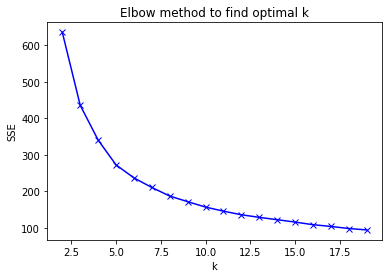

In [13]:
area_vars = ['bed_bath_ratio','structure_dollar_per_sqft','age']
wrangle_zillow.elbow_plot(X_train_scaled, cluster_vars=area_vars)

In [14]:
def run_kmeans(X_train,X_train_scaled,k, cluster_vars, cluster_col_name):
    # create kmeans object
    kmeans = KMeans(n_clusters = k, random_state = 13)
    kmeans.fit(X_train_scaled[cluster_vars])
    # predict and create a dataframe with cluster per observation
    train_clusters = \
        pd.DataFrame(kmeans.predict(X_train_scaled[cluster_vars]),
                              columns=[cluster_col_name],
                              index=X_train.index)
    
    return train_clusters, kmeans
   

train_clusters, kmeans = run_kmeans(X_train,X_train_scaled,k=5, cluster_vars=area_vars, cluster_col_name='bedbathsqft')

In [15]:
def kmeans_transform(X_scaled, kmeans, cluster_vars, cluster_col_name):
    kmeans.transform(X_scaled[cluster_vars])
    trans_clusters = \
        pd.DataFrame(kmeans.predict(X_scaled[cluster_vars]),
                              columns=[cluster_col_name],
                              index=X_scaled.index)
    
    return trans_clusters

In [16]:
validate_clusters = kmeans_transform(X_validate_scaled, kmeans, cluster_vars=area_vars, cluster_col_name='bedbathsqft')

test_clusters = kmeans_transform(X_test_scaled, kmeans, cluster_vars=area_vars, cluster_col_name='bedbathsqft')

In [17]:
#centroid_col_names = ['centroid_' + i for i in area_vars]
#centroid_col_names

#centroids = pd.DataFrame(kmeans.cluster_centers_, 
             #columns=centroid_col_names).reset_index().rename(columns={'index': 'bedbathsqft'})

def get_centroids(cluster_vars, cluster_col_name, kmeans):
    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroids = pd.DataFrame(kmeans.cluster_centers_, 
             columns=centroid_col_names).reset_index().rename(columns={'index': cluster_col_name})
    
    return centroids

In [18]:
centroids = get_centroids(cluster_vars=area_vars,cluster_col_name='bedbathsqft',kmeans=kmeans)
centroids

,bedbathsqft,centroid_bed_bath_ratio,centroid_structure_dollar_per_sqft,centroid_age
0,0,0.408605,0.047741,0.510484
1,1,0.168273,0.065263,0.317045
2,2,0.208179,0.052374,0.674722
3,3,0.137819,0.088882,0.158499
4,4,0.197199,0.053960,0.461525


In [19]:
X_train, X_train_scaled = wrangle_zillow.add_to_train(train_clusters, centroids, X_train, X_train_scaled, cluster_col_name = 'bedbathsqft')

In [20]:
X_validate, X_validate_scaled = wrangle_zillow.add_to_train(validate_clusters, centroids, X_validate, X_validate_scaled, cluster_col_name = 'bedbathsqft')

In [21]:
X_test, X_test_scaled = wrangle_zillow.add_to_train(test_clusters, centroids, X_test, X_test_scaled, cluster_col_name = 'bedbathsqft')

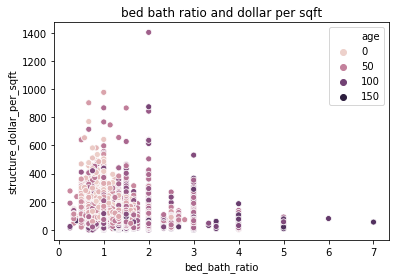

In [30]:
sns.scatterplot(x='bed_bath_ratio', y='structure_dollar_per_sqft', hue='age', data=X_train)
plt.title("bed bath ratio and dollar per sqft")
plt.show()

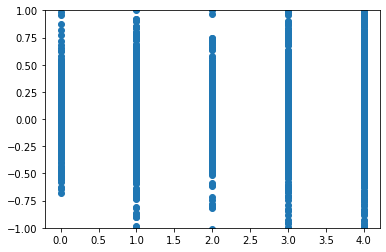

In [36]:
plt.scatter(X_train_scaled.bedbathsqft, y_train.logerror)
plt.ylim(-1,1)
plt.show()

In [24]:
sns.boxplot(X_train_scaled.room_cluster, y_train.logerror)
plt.ylim(-.05,.05)
plt.show()

['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'LA',
 'Orange',
 'Ventura',
 'age',
 'taxrate',
 'acres',
 'structure_dollar_per_sqft',
 'land_dollar_per_sqft',
 'bed_bath_ratio',
 'bedbathsqft',
 'centroid_bed_bath_ratio',
 'centroid_structure_dollar_per_sqft',
 'centroid_age']

In [25]:
X_test_scaled.columns.to_list()

['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'LA',
 'Orange',
 'Ventura',
 'age',
 'taxrate',
 'acres',
 'structure_dollar_per_sqft',
 'land_dollar_per_sqft',
 'bed_bath_ratio',
 'bedbathsqft',
 'centroid_bed_bath_ratio',
 'centroid_structure_dollar_per_sqft',
 'centroid_age']